# Linear regression model - Honey project

Hi there, the next project is based on the Honey production in USA from the 90's. All the details about the data set and its characteristics could be find in the Kaggle url:

https://www.kaggle.com/datasets/jessicali9530/honey-production


The main goal is predict the future production of honey according to the next features taken from Kaggle website:

* __numcol__: Number of honey producing colonies. Honey producing colonies are the maximum number of colonies from which honey was taken during the year. It is possible to take honey from colonies which did not survive the entire year.


* __yieldpercol__: Honey yield per colony. Unit is pounds



* __totalprod__: Total production (numcol x yieldpercol). Unit is pounds



* __stocks__: Refers to stocks held by producers. Unit is pounds



* __priceperlb__: Refers to average price per pound based on expanded sales. Unit is dollars.



* __prodvalue__: Value of production (totalprod x priceperlb). Unit is dollars.



Other useful information: Certain states are excluded every year (ex. CT) to avoid disclosing data for individual operations. Due to rounding, total colonies multiplied by total yield may not equal production. Also, summation of states will not equal U.S. level value of production.

Moreover, the honeybeed population is essential to the agriculture and human being.

Note: When you're reading the general description and characteristics of this dataset, you can confirm the calculations made previously. Also, we'll imported the **Gradient_descent_functions.py** script to understand the facility that sklearn provided ud to ML models.


In [1]:
# Step 1: Import the classic packages:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from Gradient_descent_functions import *
from sklearn import linear_model

# Exploratory Data Analysis (EDA)

Let's take a general look into the features:

In [2]:
# Step 2: Import the csv final file and check the data structure:
data_honey_prod = pd.read_csv('honeyproduction.csv')
data_honey_prod.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [3]:
print('Total rows and columns: {}'.format(data_honey_prod.shape))

Total rows and columns: (626, 8)


In [4]:
for i in (data_honey_prod.columns):
    print('Column {} and number of records: {}'.format(i, data_honey_prod[i].value_counts().sum()))

Column state and number of records: 626
Column numcol and number of records: 626
Column yieldpercol and number of records: 626
Column totalprod and number of records: 626
Column stocks and number of records: 626
Column priceperlb and number of records: 626
Column prodvalue and number of records: 626
Column year and number of records: 626


In [5]:
for i in (data_honey_prod.columns):
    print('Column {} and number of is NA values: {}'.format(i, data_honey_prod[i].isna().sum()))

Column state and number of is NA values: 0
Column numcol and number of is NA values: 0
Column yieldpercol and number of is NA values: 0
Column totalprod and number of is NA values: 0
Column stocks and number of is NA values: 0
Column priceperlb and number of is NA values: 0
Column prodvalue and number of is NA values: 0
Column year and number of is NA values: 0


In [6]:
data_honey_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


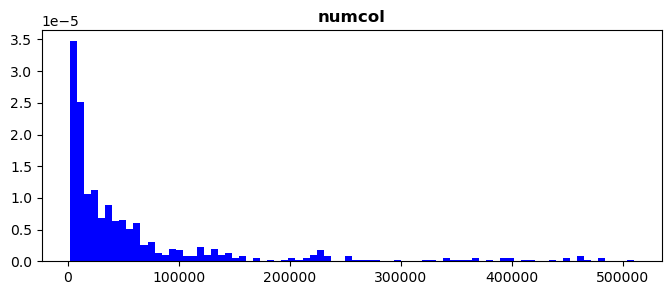

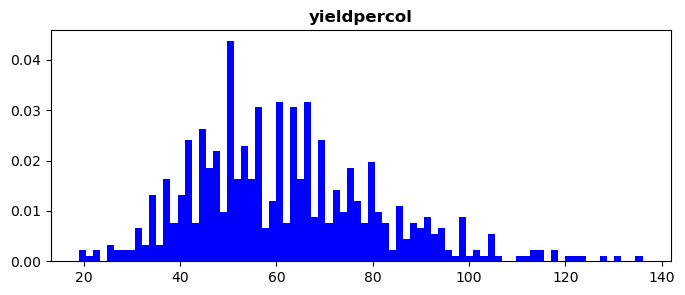

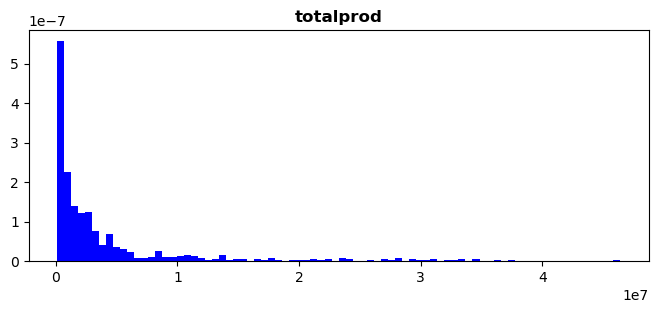

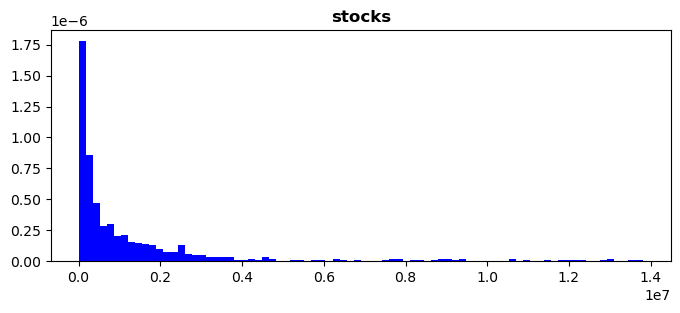

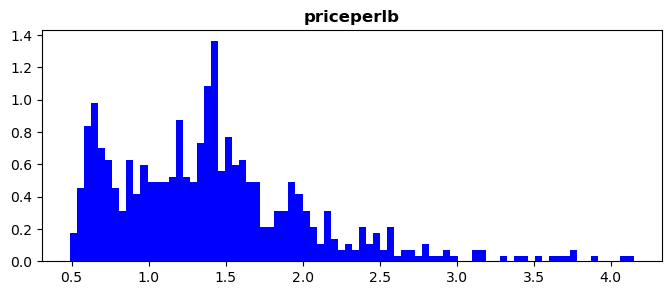

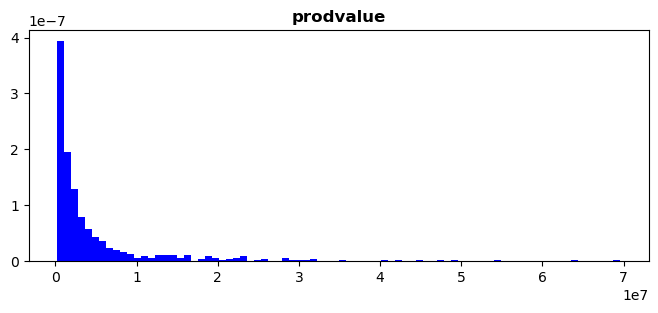

In [7]:
columns_dataset = ['numcol', 'yieldpercol', 'totalprod', 'stocks', 'priceperlb', 'prodvalue']

for j in columns_dataset:
    plt.figure(figsize=(8, 3))
    plt.title(j, fontweight ="bold")
    data_honey_prod[j].hist(bins=80, color = 'blue', density = True, histtype ='bar')
    plt.grid(visible = None)
    plt.show()

In [8]:
# Number of records per year
data_honey_prod['year'].value_counts()

2001    44
2002    44
2003    44
1998    43
1999    43
2000    43
2004    41
2005    41
2006    41
2007    41
2008    41
2009    40
2010    40
2011    40
2012    40
Name: year, dtype: int64

In [9]:
# Total production average per year 
prod_per_year = data_honey_prod.groupby('year').totalprod.mean().reset_index()
prod_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


#### Then, we take our year column like predictor to forecast the production per year feature:

In [10]:
X = prod_per_year['year']
X = X.values.reshape(-1, 1)
X

array([[1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012]])

In [11]:
y = prod_per_year.totalprod

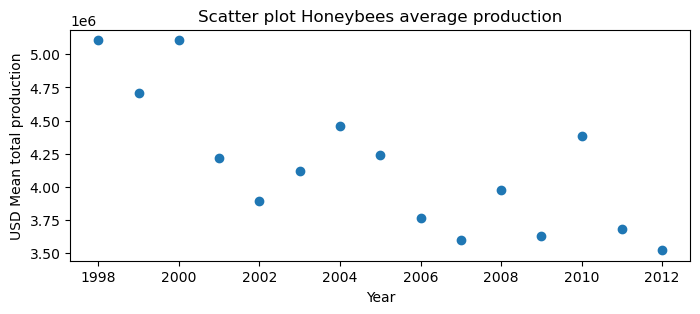

In [12]:
# We plot the X and y values:
plt.figure(figsize=(8, 3))
plt.scatter(X, y)
plt.title('Scatter plot Honeybees average production')
plt.xlabel('Year')
plt.ylabel('USD Mean total production')
plt.show()


In [13]:
# We create a LinearRegression instance:
regr = linear_model.LinearRegression()

In [14]:
# Then, We fit the instance with the X and y values:
regr.fit(X, y)

LinearRegression()

In [15]:
# Get the best parameters:
print([regr.coef_, regr.intercept_])


[array([-88303.18915238]), 181208083.10732982]


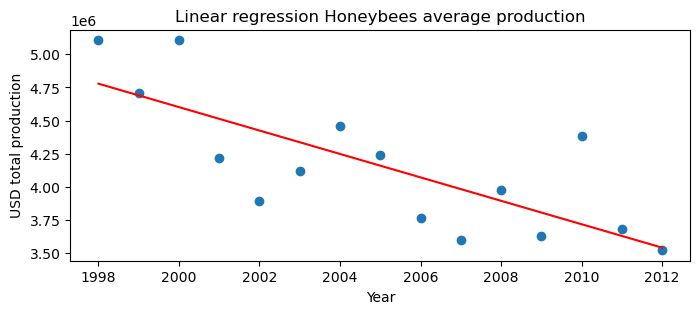

In [16]:
# Then, make the forecast with the predict function and plot them:
y_predict = regr.predict(X)
plt.figure(figsize=(8, 3))
plt.scatter(X, y)
plt.plot(X, y_predict, color = 'red')
plt.title('Linear regression Honeybees average production')
plt.xlabel('Year')
plt.ylabel('USD total production')
plt.show()

Now, We predict the results from 2013 to onwards:

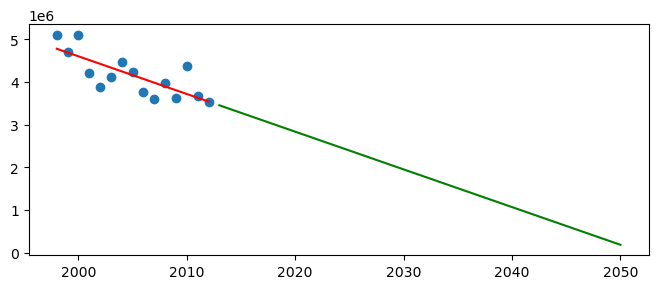

In [17]:
X_future = np.array(range(2013, 2051))
X_future = X_future.reshape(-1, 1)

future_predict = regr.predict(X_future)
plt.figure(figsize=(8, 3))
plt.scatter(X, y)
plt.plot(X, y_predict, color = 'red')
plt.plot(X_future, future_predict, color = 'green')
plt.show()

##### If you take the slope m and intercept b you can represent the best fit to the linear model (It's equal to the final plot from line 16 ):

In [18]:
m = regr.coef_
b = regr.intercept_

In [19]:
y_iter = [m*x + b for x in X]

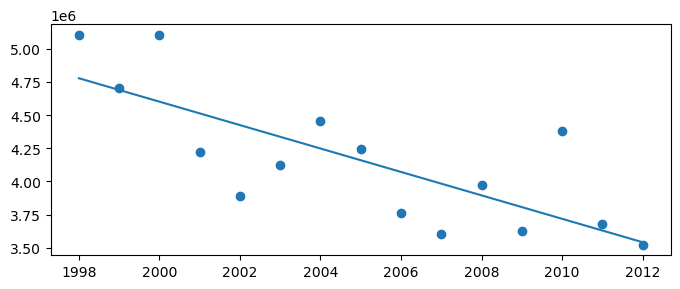

In [20]:
plt.figure(figsize=(8, 3))
plt.scatter(X, y)
plt.plot(X, y_iter)
plt.show()